<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Detection-of-Facial-Keypoints" data-toc-modified-id="Detection-of-Facial-Keypoints-1">Detection of Facial Keypoints</a></span><ul class="toc-item"><li><span><a href="#Objective:" data-toc-modified-id="Objective:-1.1">Objective:</a></span></li><li><span><a href="#Data:" data-toc-modified-id="Data:-1.2">Data:</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-1.2.1">Exploring the data</a></span></li><li><span><a href="#Process-the-data" data-toc-modified-id="Process-the-data-1.2.2">Process the data</a></span></li><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data-1.2.3">Visualizing the data</a></span></li></ul></li><li><span><a href="#Data-Augmentation:" data-toc-modified-id="Data-Augmentation:-1.3">Data Augmentation:</a></span><ul class="toc-item"><li><span><a href="#Augmentation-1:-Horizontal-Flipping" data-toc-modified-id="Augmentation-1:-Horizontal-Flipping-1.3.1">Augmentation 1: Horizontal Flipping</a></span></li><li><span><a href="#Augmentation-2:-Vertical-Flipping" data-toc-modified-id="Augmentation-2:-Vertical-Flipping-1.3.2">Augmentation 2: Vertical Flipping</a></span></li><li><span><a href="#Augmentation-3:-Adjust-Brightness" data-toc-modified-id="Augmentation-3:-Adjust-Brightness-1.3.3">Augmentation 3: Adjust Brightness</a></span></li><li><span><a href="#Combine-Augmentations" data-toc-modified-id="Combine-Augmentations-1.3.4">Combine Augmentations</a></span></li></ul></li><li><span><a href="#Process-and-prepare-the-data" data-toc-modified-id="Process-and-prepare-the-data-1.4">Process and prepare the data</a></span><ul class="toc-item"><li><span><a href="#Rescaling-image-data" data-toc-modified-id="Rescaling-image-data-1.4.1">Rescaling image data</a></span></li><li><span><a href="#Reshape-images" data-toc-modified-id="Reshape-images-1.4.2">Reshape images</a></span></li><li><span><a href="#Extracting-Images-and-Targets-from-the-data" data-toc-modified-id="Extracting-Images-and-Targets-from-the-data-1.4.3">Extracting Images and Targets from the data</a></span></li><li><span><a href="#Create-Train-and-Test-splits" data-toc-modified-id="Create-Train-and-Test-splits-1.4.4">Create Train and Test splits</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.5">Modelling</a></span><ul class="toc-item"><li><span><a href="#Define-Residual-Blocks" data-toc-modified-id="Define-Residual-Blocks-1.5.1">Define Residual Blocks</a></span></li><li><span><a href="#Build-model-using-Residual-Blocks" data-toc-modified-id="Build-model-using-Residual-Blocks-1.5.2">Build model using Residual Blocks</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-1.5.3">Compile the model</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-1.5.4">Fit the model</a></span></li><li><span><a href="#Plot-progress-of-training-/-validation-loss-and-accuracy" data-toc-modified-id="Plot-progress-of-training-/-validation-loss-and-accuracy-1.5.5">Plot progress of training / validation loss and accuracy</a></span></li><li><span><a href="#Save-the-model-architecture" data-toc-modified-id="Save-the-model-architecture-1.5.6">Save the model architecture</a></span></li></ul></li><li><span><a href="#Assess-model-Performance" data-toc-modified-id="Assess-model-Performance-1.6">Assess model Performance</a></span><ul class="toc-item"><li><span><a href="#Performance-of-saved-model-with-least-validation-loss" data-toc-modified-id="Performance-of-saved-model-with-least-validation-loss-1.6.1">Performance of saved model with least validation loss</a></span></li><li><span><a href="#Load-checkpointed-model" data-toc-modified-id="Load-checkpointed-model-1.6.2">Load checkpointed model</a></span></li><li><span><a href="#Make-predictions-and-calculate-accuracy" data-toc-modified-id="Make-predictions-and-calculate-accuracy-1.6.3">Make predictions and calculate accuracy</a></span></li></ul></li></ul></li></ul></div>

# Detection of Facial Keypoints

<text>Keypoints are nothing but the points of importance in detecting / identifying a person's face, such as, the positions of the eyes, eyebrows, nose etc.
    
Detecing facial keypoints is a very challenging problem.  

Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions.
    
Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.</text>

It can be used as a building block in several applications, such as:

* tracking faces in images and video
* analysing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition

Facial keypoints are the vital areas in the face from which a person’s facial expressions. Therefore, emotions can be evaluated. 

They play an **important role in developing real-time applications** for detecting drowsiness, analyzing biometrics and reading a person’s emotions.

## Objective:
Given an image of a person's face, we must be able to detect/locate the facial key points .


In [ ]:
!conda install -y gdown 

In [ ]:
# Imports

In [ ]:
import pandas as pd
import numpy as np
import PIL
import json
import os
import pickle
import cv2
import math
import sklearn
import random
import copy
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers,layers
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.layers import Add,Concatenate,Dense,Dropout,Flatten,Conv2D,AveragePooling2D,BatchNormalization,Input,MaxPooling2D,MaxPool2D,ZeroPadding2D,Activation

## Data:

The data for this task is available at https://www.kaggle.com/c/facial-keypoints-detection/data

In [ ]:
!gdown https://drive.google.com/uc?id=1gOFJivdA1wk-QeB96-BR_-Qvm3EAVNk-

In [ ]:
keypoints_df = pd.read_csv('/kaggle/working/data.csv',low_memory=False)

In [ ]:
keypoints_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


### Exploring the data

In [ ]:
keypoints_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

We see that there are a lot of fields indicating a variety of facial keypoints.

In [ ]:
keypoints_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [ ]:
keypoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

Observations :
    
    * We have 2140 samples of data
    * For each sample, the first 30 columns represent the target values(15 (x,y) coordinates),i.e coordinates of their 
    facial keypoints   
    * The last column contains the image as object(text). It does need conversion.
    * No null values exist in the dataset.

Representation of image data

In [ ]:
type(keypoints_df['Image'][0])

str

In [ ]:
keypoints_df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [ ]:
int(sqrt(np.fromstring(keypoints_df['Image'][0], dtype  = int,sep= ' ').shape[0]))

96

We are able to see that each image is of size (96,96) and has been represented as a string of space separated pixel values

### Process the data

We convert the image from string format to a list, and reshape it to (96,96)

In [ ]:
keypoints_df['Image'] = keypoints_df['Image'].apply(lambda x : np.fromstring(x,dtype  = int,sep= ' ').reshape(96,96))


In [ ]:
keypoints_df['Image'][0].shape

(96, 96)

In [ ]:
keypoints_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


### Visualizing the data

We shall define a function that plots the images along with the keypoints highlighted.

In [ ]:
def viz_keypoints_df(df,choice = None,plot_num=16,size = 20):
    """
    Takes in the dataframe and number of random samples to plot 
    """
    fig = plt.figure(figsize=(size, size))
    cells = round(sqrt(plot_num))
    if choice != None:
        plt.imshow(df['Image'][choice],cmap = 'gray')
        for k in range(1,31,2):
            plt.plot(df.loc[choice][k-1], df.loc[choice][k],'rx')
    else:
        for cell in range(plot_num):
            choice = random.randint(0,len(df)-1)
            ax = fig.add_subplot(cells,cells,cell+1)
            image = plt.imshow(df['Image'][choice],cmap = 'gray')
            for k in range(1,31,2):
                plt.plot(df.loc[choice][k-1], df.loc[choice][k],'rx')

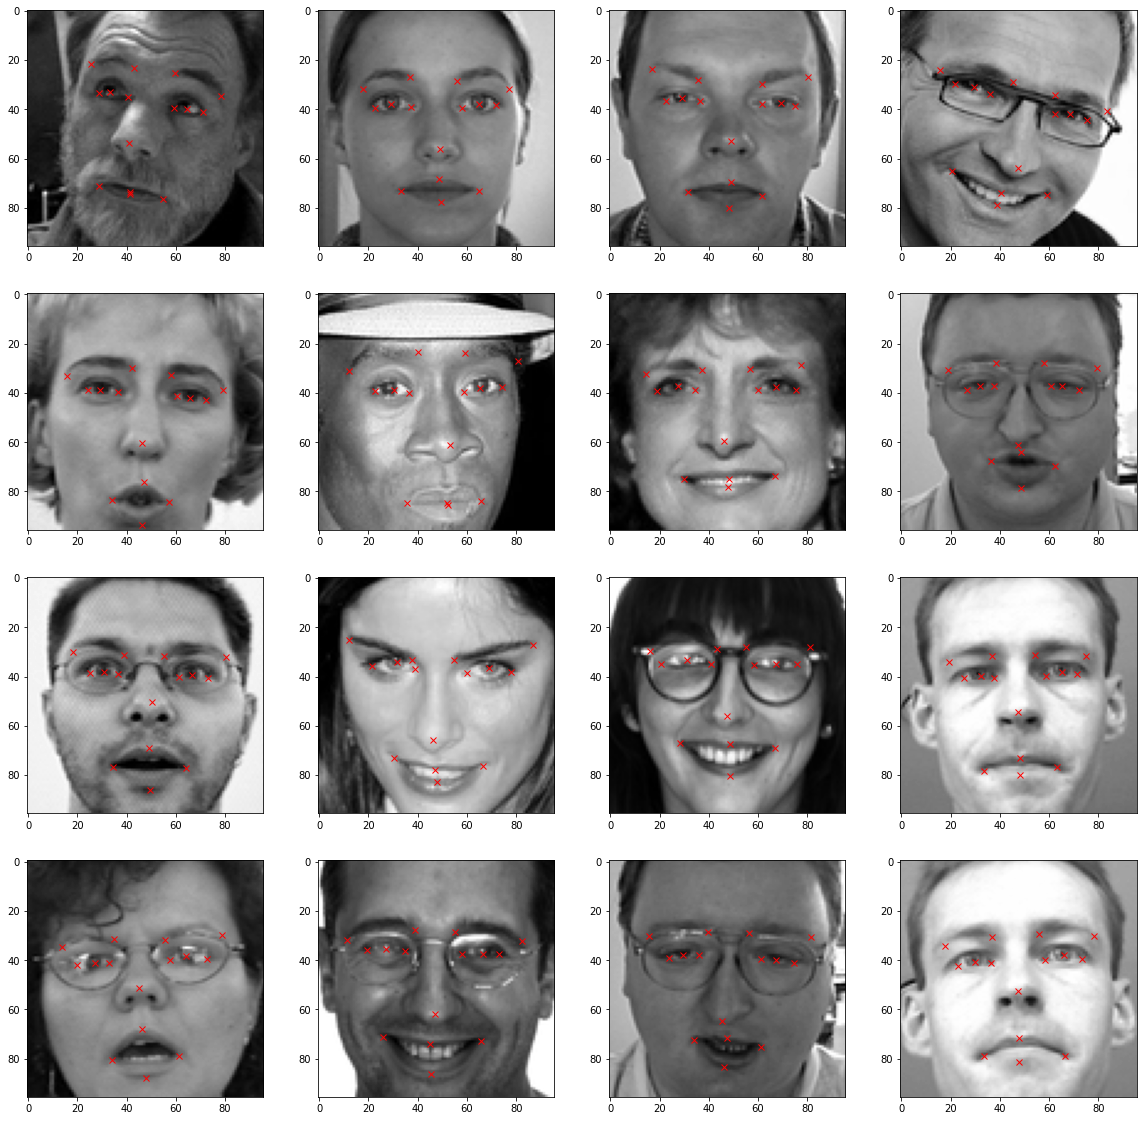

In [ ]:
viz_keypoints_df(keypoints_df)

So, now we know how the information is represented in the dataset and are able to visualize it.

In [ ]:
columns =list(keypoints_df.columns[:-1])  # except last(image) column
columns

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [ ]:
with open('/kaggle/working/keypoints_df_columns.json','w') as col_file:
    json.dump(columns,col_file,indent = 2)

## Data Augmentation:

In the scenario of detecting facial key points, it would not be apt to restrict the user's pose to only a particular view or angle.

So, in order to enrich our data with different views and conditions of the available samples, we shall perform manual image augmentation.

### Augmentation 1: Horizontal Flipping

In this case, only the y coordinates of the keypoints change, and we take care of that, by subtracting them from image width to obtain new y coordinates

We define a function that takes in our data and returns a new dataframe with the images horizontally flipped and the y coordinates 

In [ ]:
def horiz_aug(df):
    
    new_df = copy.copy(df)
    
    new_df['Image'] = new_df['Image'].apply(lambda x: np.flip(x,axis = 1))
    
    targets = new_df.columns[:-1]
    
    for i in range(len(targets)):
        if i%2 == 0:                                                   # Only consider y coordinates
            new_df[targets[i]] = 96.0 - new_df[targets[i]]             # Subtracting from image width
    
    return new_df
            

In [ ]:
hor_df = horiz_aug(keypoints_df)

To clearly spot the changes that we've established, lets plot a random image and its keypoints from both the original and augmented data

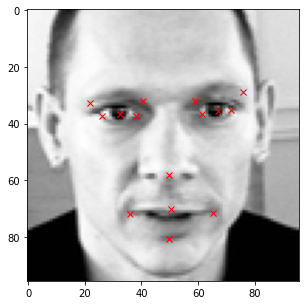

In [ ]:
viz_keypoints_df(keypoints_df,17,1,5)

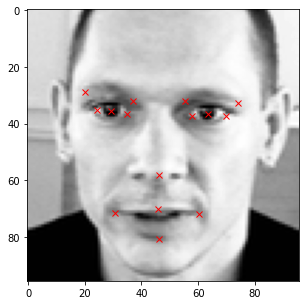

In [ ]:
viz_keypoints_df(hor_df,17,1,5)

So we see that the images have been flipped horizontally and the corresponding features' y coordinates have changed appropriately

### Augmentation 2: Vertical Flipping

This is very similar to the previous task and is different only in that, it is the x coordinates that change here

In [ ]:
def vert_aug(df):
    
    new_df = copy.copy(df)
    
    new_df['Image'] = new_df['Image'].apply(lambda x: np.flip(x,axis = 0))
    
    targets = new_df.columns[:-1]
    
    for i in range(len(targets)):
        if i%2 != 0:                                                   # Only consider x coordinates
            new_df[targets[i]] = 96.0 - new_df[targets[i]]             # Subtracting from image height
    
    return new_df
            

In [ ]:
ver_df = vert_aug(keypoints_df)

Visualize changes

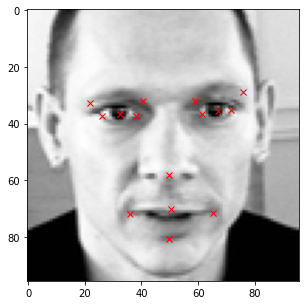

In [ ]:
viz_keypoints_df(keypoints_df,17,1,5)

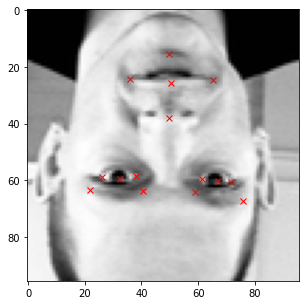

In [ ]:
viz_keypoints_df(ver_df,17,1,5)

### Augmentation 3: Adjust Brightness

Here we try to increase the brightness of an image by a random value from 0.5 to 2.
Also we shall clip the resulting pixel intensity values which exceed 255, to 255

In [ ]:
def random_brightify(df):
    
    new_df = copy.copy(df)
    
    new_df['Image'] = new_df['Image'].apply(lambda x : np.clip(random.uniform(0.5,1.75) * x,0.0,255.0))
    
    return new_df

In [ ]:
rand_bright_df = random_brightify(keypoints_df)

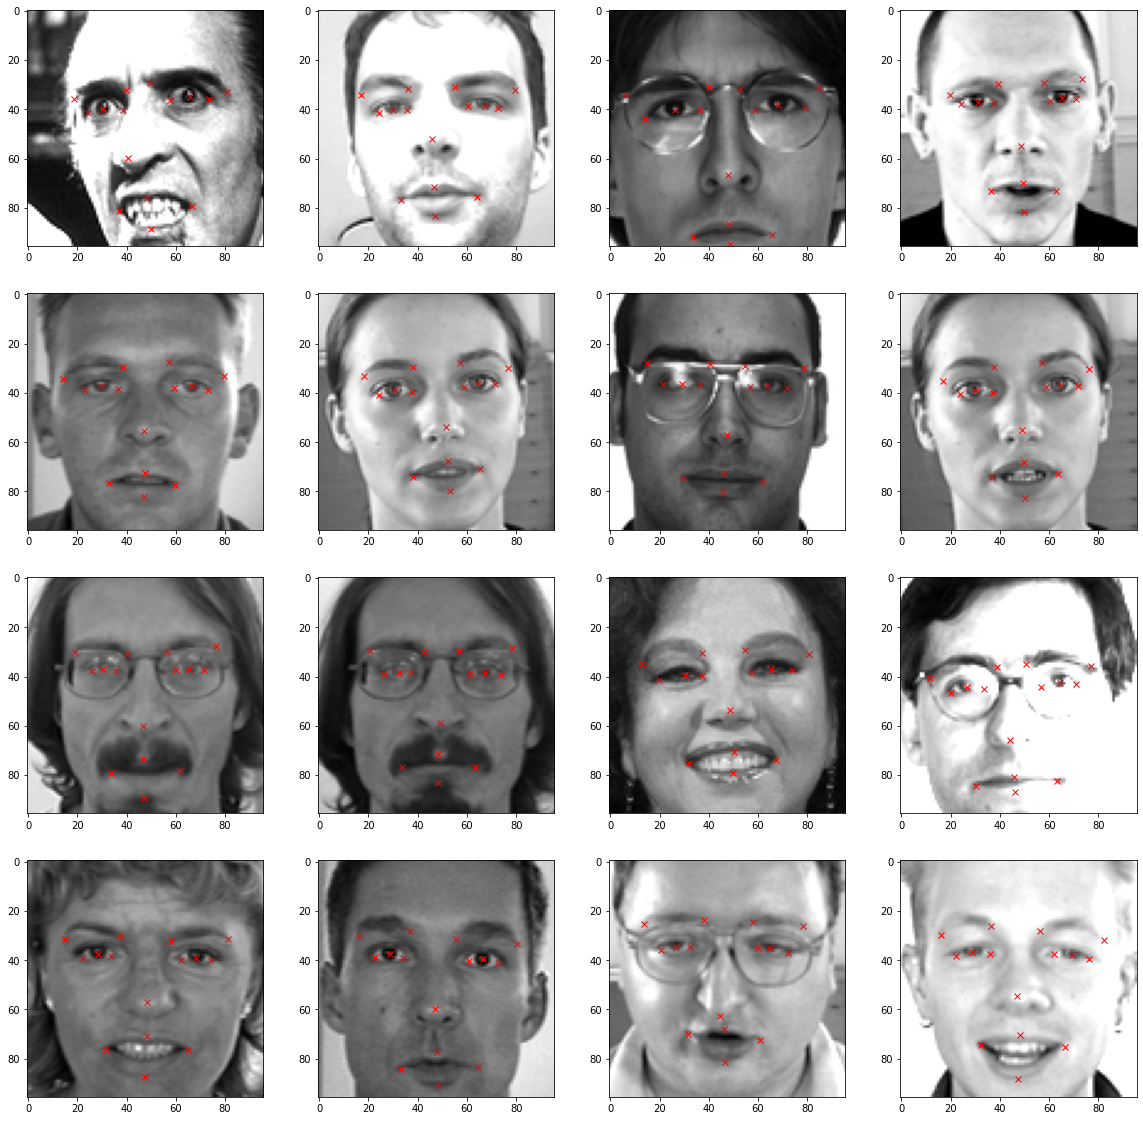

In [ ]:
viz_keypoints_df(rand_bright_df)

As we can see, the images have various brightness levels.

There are other augmentations that we could perform, but for now, we proceed to the next stage

### Combine Augmentations

In [ ]:
def combine_augs(*args):
    df_keypoints = copy.copy(keypoints_df)
    for df in args:
        df_keypoints = pd.concat([df_keypoints,df],axis=0)
    return df_keypoints

In [ ]:
data = combine_augs(hor_df,ver_df,rand_bright_df)
print(data.shape)

(8560, 31)


This is now the shape of the entire data.

In [ ]:
data = data.sample(frac=1,random_state = 42).reset_index(drop=True)
data

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,61.719145,59.830418,30.596696,58.161322,54.467444,58.223518,68.850340,58.733722,36.756074,56.644315,...,37.306074,65.932867,25.442812,33.920374,22.989977,45.632840,24.680694,46.882539,15.381090,"[[19, 19, 19, 19, 18, 18, 18, 21, 18, 17, 18, ..."
1,67.776780,59.134439,28.361366,57.739239,59.350634,58.646634,73.009171,58.785639,35.686244,57.739239,...,37.850537,64.288780,21.114537,35.686244,18.324293,50.336780,23.207805,50.336780,11.348293,"[[56, 60, 49, 35, 30, 28, 26, 29, 43, 60, 69, ..."
2,65.916420,58.916476,29.613650,59.816727,60.516252,58.016895,71.510601,58.649287,34.114238,59.216559,...,31.614881,59.315916,18.413874,32.013650,20.513790,45.514741,22.314294,44.014993,10.613035,"[[75, 66, 59, 70, 78, 82, 83, 84, 87, 89, 91, ..."
3,63.430520,41.117532,31.404546,32.721429,57.079870,40.942208,70.229221,44.078571,37.813636,35.857792,...,60.979869,53.817551,79.715440,23.955844,74.604917,40.166234,80.130519,40.151577,80.540909,"[[91.28514990999678, 96.35654712721882, 94.666..."
4,32.577391,34.002783,64.754609,32.604000,38.173565,35.634783,27.680870,35.634783,58.692522,33.536348,...,54.754957,40.038783,68.511652,61.024174,67.346087,50.065043,64.781217,50.764696,74.107826,"[[174, 175, 175, 173, 175, 177, 177, 188, 188,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8555,65.771478,59.686609,27.396870,59.842087,58.314087,58.909913,74.782609,58.754435,36.563130,58.443826,...,39.023304,63.907130,18.826087,28.639652,19.447652,46.040348,22.399652,45.574261,14.010087,"[[43, 52, 60, 63, 59, 67, 61, 69, 61, 69, 102,..."
8556,66.325647,59.369412,28.049882,59.369412,59.596235,58.528000,71.373176,58.528000,33.938824,58.948706,...,40.441412,58.754824,21.934118,34.358588,21.934118,47.398588,27.823059,46.557176,12.680471,"[[111, 94, 82, 71, 52, 49, 64, 75, 72, 60, 57,..."
8557,69.492245,57.540245,29.216327,58.853878,63.801796,56.664490,74.307918,56.226612,34.469878,58.416000,...,40.029061,61.174531,21.642122,32.718367,23.392653,47.165388,28.646204,46.289633,12.448653,"[[78, 68, 59, 61, 69, 72, 63, 42, 45, 73, 84, ..."
8558,69.626264,32.218596,28.746566,33.028075,63.554717,33.837555,75.292075,33.837555,36.841358,34.242294,...,49.622943,67.197283,73.907321,35.626868,71.884075,50.602868,67.431849,51.007698,82.406943,"[[29, 21, 25, 27, 26, 27, 27, 29, 21, 14, 19, ..."


## Process and prepare the data

### Rescaling image data

We perform the general rescaling practice of dividing all image pixel values by 255

In [ ]:
np.array(data).shape

(8560, 31)

In [ ]:
images = np.array(data)[:,30]

images = images/255.

### Reshape images

As of now, each image is of shape (96, 96)

In order to feed to a neural network, the shape of each image should be (96, 96, 1)

In [ ]:
images[0].shape

(96, 96)

In [ ]:
for i in range(len(images)):
    images[i] = np.expand_dims(images[i],axis =2)

In [ ]:
images[0].shape

(96, 96, 1)

Check after reshaping images

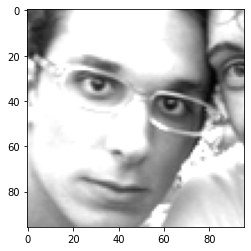

In [ ]:
plt.imshow(images[3].reshape(96,96),cmap = 'gray')

### Extracting Images and Targets from the data

Images

In [ ]:
X = np.empty((len(data),96,96,1))
for i in range(len(data)):
    X[i,:] = images[i]

In [ ]:
X.shape

(8560, 96, 96, 1)

In [ ]:
X = np.asarray(X).astype('float32')

Targets

In [ ]:
y = np.array(data)[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

### Create Train and Test splits

We use 85% of the data for training, and the rest for validation.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7276, 96, 96, 1) (7276, 30)
(1284, 96, 96, 1) (1284, 30)


## Modelling

We shall build the ResNet model from scratch for our facial keypoint prediction task

### Define Residual Blocks

In [ ]:
def res_block(X, filter, stage):
    # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

### Build model using Residual Blocks

* First, we perform a set of convolutions, normalizations, activations on the data.

* Then we pass it through stages of residual blocks.

* Finally, we perform average pooling and pass through several Fully Connected Layers with Dropout.

* The output for each sample should be vector of dimension 30(number of x and y coordinates)

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0),kernel_regularizer=tf.keras.regularizers.l2())(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.3)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.3)(X)
X = Dense(1024, activation = 'relu')(X)
X = Dropout(0.3)(X)

X = Dense(30, activation = 'relu')(X)


facial_keypoints_model = Model( inputs= X_input, outputs = X)
facial_keypoints_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

Optimizer

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)

### Compile the model

The metric used is mean_squared_error

In [ ]:
facial_keypoints_model.compile(loss ='mean_squared_error', optimizer= adam, metrics = ['accuracy'])

Callbacks

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',
                              patience=14,
                              restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath='/kaggle/working/weights_detection.hdf5',
                             save_best_only=True,
                             verbose=1)
# monitors validation_loss by default

reduce_lr = ReduceLROnPlateau(factor=0.2,patience=7,verbose=1)

### Fit the model

In [ ]:
history = facial_keypoints_model.fit(X_train,y_train,
                                     batch_size=128,
                                     epochs =65,
                                     validation_split=0.07,  # About 500 samples for validation
                                     callbacks=[checkpoint,earlystopping, reduce_lr])

Epoch 1/65
53/53 [==============================] - 6s 55ms/step - loss: 54.3510 - accuracy: 0.6082 - val_loss: 81.4430 - val_accuracy: 0.7333

Epoch 00001: val_loss improved from inf to 81.44297, saving model to /kaggle/working/weights_detection.hdf5
Epoch 2/65
53/53 [==============================] - 2s 45ms/step - loss: 54.5983 - accuracy: 0.6113 - val_loss: 109.6719 - val_accuracy: 0.7255

Epoch 00002: val_loss did not improve from 81.44297
Epoch 3/65
53/53 [==============================] - 2s 44ms/step - loss: 53.5050 - accuracy: 0.6195 - val_loss: 75.3809 - val_accuracy: 0.7353

Epoch 00003: val_loss improved from 81.44297 to 75.38092, saving model to /kaggle/working/weights_detection.hdf5
Epoch 4/65
53/53 [==============================] - 2s 43ms/step - loss: 52.1436 - accuracy: 0.6176 - val_loss: 83.7558 - val_accuracy: 0.7255

Epoch 00004: val_loss did not improve from 75.38092
Epoch 5/65
53/53 [==============================] - 2s 43ms/step - loss: 51.9412 - accuracy: 0.631

### Plot progress of training / validation loss and accuracy

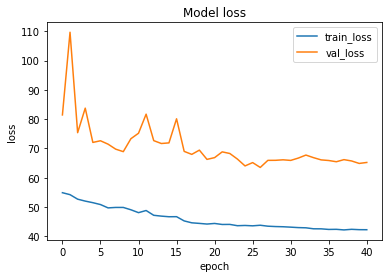

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

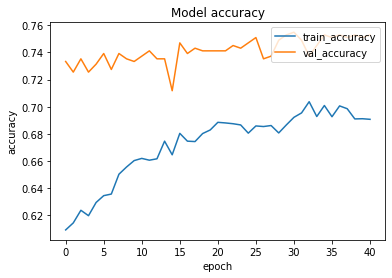

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'upper right')
plt.show()

### Save the model architecture

In [ ]:
model_json = facial_keypoints_model.to_json()
with open("/kaggle/working/detection.json","w") as json_file:
    json_file.write(model_json)


## Assess model Performance

In [ ]:
result = facial_keypoints_model.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 0s 7ms/step - loss: 75.9479 - accuracy: 0.7664
Accuracy : 0.7663551568984985


Since the targets are continuous variables, accuracy is not such a good evaluation metric here.

Rather we need to focus on regression metrics such as MSE,MmAE etc.

In [ ]:
preds = facial_keypoints_model.predict(X_test)
print(preds.shape)

(1284, 30)


In [ ]:
print(mean_squared_error(y_test, preds))

51.332275


In [ ]:
print(mean_absolute_error(y_test, preds))

3.2992852


### Performance of saved model with least validation loss

### Load checkpointed model

In [ ]:
with open('/kaggle/working/detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('/kaggle/working/weights_detection.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

### Make predictions and evaluate

In [ ]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 2s 7ms/step - loss: 79.4464 - accuracy: 0.7661
Accuracy : 0.7663551568984985


In [ ]:
preds = model_1_facialKeyPoints.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, preds))

51.332275


In [ ]:
print(mean_absolute_error(y_test, preds))

3.2992852


##### Other attempts

In [ ]:
facial_keypoints_model.compile(loss ='mean_squared_error', optimizer= adam, metrics = ['mse'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',
                              patience=14,
                              restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath='/kaggle/working/weights_facial_kps.hdf5',
                             save_best_only=True,
                             verbose=1)
# monitors validation_loss by default

reduce_lr = ReduceLROnPlateau(factor=0.2,patience=7,verbose=1)

In [ ]:
h = facial_keypoints_model.fit(X_train,y_train,
                                     batch_size=128,
                                     epochs = 75,
                                     validation_split=0.07,  # About 500 samples for validation
                                     callbacks=[checkpoint,earlystopping, reduce_lr])

Epoch 1/75
53/53 [==============================] - 6s 55ms/step - loss: 1230.1141 - mse: 1204.4411 - val_loss: 1984.8606 - val_mse: 1959.1748

Epoch 00001: val_loss improved from inf to 1984.86060, saving model to /kaggle/working/weights_facial_kps.hdf5
Epoch 2/75
53/53 [==============================] - 2s 42ms/step - loss: 341.5068 - mse: 315.8274 - val_loss: 1350.4705 - val_mse: 1324.8101

Epoch 00002: val_loss improved from 1984.86060 to 1350.47046, saving model to /kaggle/working/weights_facial_kps.hdf5
Epoch 3/75
53/53 [==============================] - 2s 44ms/step - loss: 202.5683 - mse: 176.9144 - val_loss: 826.9056 - val_mse: 801.2756

Epoch 00003: val_loss improved from 1350.47046 to 826.90564, saving model to /kaggle/working/weights_facial_kps.hdf5
Epoch 4/75
53/53 [==============================] - 2s 42ms/step - loss: 172.1211 - mse: 146.4997 - val_loss: 526.7501 - val_mse: 501.1518

Epoch 00004: val_loss improved from 826.90564 to 526.75012, saving model to /kaggle/work

In [ ]:
preds = facial_keypoints_model.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, preds))

56.044147


In [ ]:
print(mean_absolute_error(y_test, preds))

3.6397467
